In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("ANN_PROJECT.csv")
data

,Gender,Batch,University,Shift,Extra Curricular Activities,Strength Area,Semester 1 GPA,Semester 2 GPA,Semester 3 GPA,Semester 4 GPA,Semester 5 GPA,Semester 6 GPA,Semester 7 GPA,Semester 8 GPA,CGPA,Pass/Fail
0,Female,2021,University of Punjab,Morning,Coding Club,Testing,3.969097,3.854644,3.941475,3.770095,3.858069,3.809486,3.864289,3.833616,3.862596,Pass
1,Female,2021,University of Punjab,Evening,Cricket,Testing,3.574915,3.714283,3.533438,3.562602,3.663333,3.500796,3.684159,3.713047,3.618322,Pass
2,Male,2022,University of Punjab,Evening,Music,Testing,3.345376,3.356813,3.468254,3.281201,3.331219,3.410345,3.404799,3.386286,3.373037,Pass
3,Female,2022,NUST,Evening,Art,Data Science,3.187141,3.062821,3.063528,3.246850,3.031718,3.132680,3.130067,3.041507,3.112039,Pass
4,Female,2021,COMSATS,Evening,Coding Club,Cyber Security,NaN,2.976591,2.868467,2.858844,2.909287,2.791646,2.822683,2.763014,2.860761,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,Male,2020,University of Punjab,Evening,Music,Web Development,0.792407,0.822209,2.260888,1.697863,0.334187,1.100108,1.983723,0.989635,1.247627,Fail
49995,Male,2022,University of Punjab,Morning,Debating,Cyber Security,3.930344,3.762608,3.953827,3.827945,3.925414,3.761134,3.813501,3.814436,3.848651,Pass
49996,Male,2022,IBA,Morning,Art,Web Development,3.644158,3.634424,3.675865,3.649634,3.547291,3.697442,3.531037,3.512543,3.611549,Pass
49997,Female,2021,University of Punjab,Evening,Music,Testing,3.317120,3.321193,3.471593,3.373837,3.480762,3.478442,3.316068,3.358130,3.389643,Pass


In [3]:
data.info

<bound method DataFrame.info of        Gender  Batch            University    Shift  \
0      Female   2021  University of Punjab  Morning   
1      Female   2021  University of Punjab  Evening   
2        Male   2022  University of Punjab  Evening   
3      Female   2022                  NUST  Evening   
4      Female   2021               COMSATS  Evening   
...       ...    ...                   ...      ...   
49994    Male   2020  University of Punjab  Evening   
49995    Male   2022  University of Punjab  Morning   
49996    Male   2022                   IBA  Morning   
49997  Female   2021  University of Punjab  Evening   
49998    Male   2021                  NUST  Evening   

      Extra Curricular Activities    Strength Area  Semester 1 GPA  \
0                     Coding Club          Testing        3.969097   
1                         Cricket          Testing        3.574915   
2                           Music          Testing        3.345376   
3                          

In [4]:
data.describe

<bound method NDFrame.describe of        Gender  Batch            University    Shift  \
0      Female   2021  University of Punjab  Morning   
1      Female   2021  University of Punjab  Evening   
2        Male   2022  University of Punjab  Evening   
3      Female   2022                  NUST  Evening   
4      Female   2021               COMSATS  Evening   
...       ...    ...                   ...      ...   
49994    Male   2020  University of Punjab  Evening   
49995    Male   2022  University of Punjab  Morning   
49996    Male   2022                   IBA  Morning   
49997  Female   2021  University of Punjab  Evening   
49998    Male   2021                  NUST  Evening   

      Extra Curricular Activities    Strength Area  Semester 1 GPA  \
0                     Coding Club          Testing        3.969097   
1                         Cricket          Testing        3.574915   
2                           Music          Testing        3.345376   
3                        

In [5]:
# List of GPA columns
gpa_columns = [col for col in data.columns if 'GPA' in col and 'CGPA' not in col]

# Check for missing values in the GPA columns
missing_values = data[gpa_columns].isnull().sum()
print("Missing values before preprocessing:")
print(missing_values)

Missing values before preprocessing:
Semester 1 GPA    14
Semester 2 GPA    15
Semester 3 GPA    13
Semester 4 GPA     9
Semester 5 GPA     9
Semester 6 GPA    14
Semester 7 GPA    11
Semester 8 GPA    15
dtype: int64


In [6]:
# Function to fill NaN values with the row's average GPA, only replacing NaN values
def fill_missing_gpa(row):
    row_gpas = row[gpa_columns]
    avg_gpa = row_gpas.mean(skipna=True).round(2)  # Calculate the average excluding NaNs
    row[gpa_columns] = row_gpas.where(row_gpas.notna(), avg_gpa)  # Replace only NaN values
    return row

In [7]:
# Apply the function to each row
data = data.apply(fill_missing_gpa, axis=1)

In [8]:
# Check for missing values after preprocessing
missing_values_after = data[gpa_columns].isnull().sum()
print("\nMissing values after preprocessing:")
print(missing_values_after)


Missing values after preprocessing:
Semester 1 GPA    0
Semester 2 GPA    0
Semester 3 GPA    0
Semester 4 GPA    0
Semester 5 GPA    0
Semester 6 GPA    0
Semester 7 GPA    0
Semester 8 GPA    0
dtype: int64


In [9]:
data

,Gender,Batch,University,Shift,Extra Curricular Activities,Strength Area,Semester 1 GPA,Semester 2 GPA,Semester 3 GPA,Semester 4 GPA,Semester 5 GPA,Semester 6 GPA,Semester 7 GPA,Semester 8 GPA,CGPA,Pass/Fail
0,Female,2021,University of Punjab,Morning,Coding Club,Testing,3.969097,3.854644,3.941475,3.770095,3.858069,3.809486,3.864289,3.833616,3.862596,Pass
1,Female,2021,University of Punjab,Evening,Cricket,Testing,3.574915,3.714283,3.533438,3.562602,3.663333,3.500796,3.684159,3.713047,3.618322,Pass
2,Male,2022,University of Punjab,Evening,Music,Testing,3.345376,3.356813,3.468254,3.281201,3.331219,3.410345,3.404799,3.386286,3.373037,Pass
3,Female,2022,NUST,Evening,Art,Data Science,3.187141,3.062821,3.063528,3.246850,3.031718,3.132680,3.130067,3.041507,3.112039,Pass
4,Female,2021,COMSATS,Evening,Coding Club,Cyber Security,2.860000,2.976591,2.868467,2.858844,2.909287,2.791646,2.822683,2.763014,2.860761,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,Male,2020,University of Punjab,Evening,Music,Web Development,0.792407,0.822209,2.260888,1.697863,0.334187,1.100108,1.983723,0.989635,1.247627,Fail
49995,Male,2022,University of Punjab,Morning,Debating,Cyber Security,3.930344,3.762608,3.953827,3.827945,3.925414,3.761134,3.813501,3.814436,3.848651,Pass
49996,Male,2022,IBA,Morning,Art,Web Development,3.644158,3.634424,3.675865,3.649634,3.547291,3.697442,3.531037,3.512543,3.611549,Pass
49997,Female,2021,University of Punjab,Evening,Music,Testing,3.317120,3.321193,3.471593,3.373837,3.480762,3.478442,3.316068,3.358130,3.389643,Pass


In [10]:
gpa_columns = [col for col in data.columns if 'GPA' in col and 'CGPA' not in col]

In [11]:
# Function to calculate CGPA from GPA values (if CGPA is NaN)
def fill_missing_cgpa(row):
    if pd.isnull(row['CGPA']):  # Only fill if CGPA is NaN
        gpa_values = row[gpa_columns]
        avg_gpa = gpa_values.mean(skipna=True).round(2)  # Calculate the average of available GPAs
        return avg_gpa
    else:
        return row['CGPA']

In [12]:
data['CGPA'] = data.apply(fill_missing_cgpa, axis=1)
data

,Gender,Batch,University,Shift,Extra Curricular Activities,Strength Area,Semester 1 GPA,Semester 2 GPA,Semester 3 GPA,Semester 4 GPA,Semester 5 GPA,Semester 6 GPA,Semester 7 GPA,Semester 8 GPA,CGPA,Pass/Fail
0,Female,2021,University of Punjab,Morning,Coding Club,Testing,3.969097,3.854644,3.941475,3.770095,3.858069,3.809486,3.864289,3.833616,3.862596,Pass
1,Female,2021,University of Punjab,Evening,Cricket,Testing,3.574915,3.714283,3.533438,3.562602,3.663333,3.500796,3.684159,3.713047,3.618322,Pass
2,Male,2022,University of Punjab,Evening,Music,Testing,3.345376,3.356813,3.468254,3.281201,3.331219,3.410345,3.404799,3.386286,3.373037,Pass
3,Female,2022,NUST,Evening,Art,Data Science,3.187141,3.062821,3.063528,3.246850,3.031718,3.132680,3.130067,3.041507,3.112039,Pass
4,Female,2021,COMSATS,Evening,Coding Club,Cyber Security,2.860000,2.976591,2.868467,2.858844,2.909287,2.791646,2.822683,2.763014,2.860761,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,Male,2020,University of Punjab,Evening,Music,Web Development,0.792407,0.822209,2.260888,1.697863,0.334187,1.100108,1.983723,0.989635,1.247627,Fail
49995,Male,2022,University of Punjab,Morning,Debating,Cyber Security,3.930344,3.762608,3.953827,3.827945,3.925414,3.761134,3.813501,3.814436,3.848651,Pass
49996,Male,2022,IBA,Morning,Art,Web Development,3.644158,3.634424,3.675865,3.649634,3.547291,3.697442,3.531037,3.512543,3.611549,Pass
49997,Female,2021,University of Punjab,Evening,Music,Testing,3.317120,3.321193,3.471593,3.373837,3.480762,3.478442,3.316068,3.358130,3.389643,Pass


In [13]:
pass_threshold = 2.0

# Function to fill missing Pass/Fail values based on CGPA
def fill_pass_fail(row):
    if pd.isnull(row['Pass/Fail']):  # Only fill if Pass/Fail is NaN
        if row['CGPA'] >= pass_threshold:
            return 'Pass'
        else:
            return 'Fail'
    else:
        return row['Pass/Fail']

In [14]:
data['Pass/Fail'] = data.apply(fill_pass_fail, axis=1)
data

,Gender,Batch,University,Shift,Extra Curricular Activities,Strength Area,Semester 1 GPA,Semester 2 GPA,Semester 3 GPA,Semester 4 GPA,Semester 5 GPA,Semester 6 GPA,Semester 7 GPA,Semester 8 GPA,CGPA,Pass/Fail
0,Female,2021,University of Punjab,Morning,Coding Club,Testing,3.969097,3.854644,3.941475,3.770095,3.858069,3.809486,3.864289,3.833616,3.862596,Pass
1,Female,2021,University of Punjab,Evening,Cricket,Testing,3.574915,3.714283,3.533438,3.562602,3.663333,3.500796,3.684159,3.713047,3.618322,Pass
2,Male,2022,University of Punjab,Evening,Music,Testing,3.345376,3.356813,3.468254,3.281201,3.331219,3.410345,3.404799,3.386286,3.373037,Pass
3,Female,2022,NUST,Evening,Art,Data Science,3.187141,3.062821,3.063528,3.246850,3.031718,3.132680,3.130067,3.041507,3.112039,Pass
4,Female,2021,COMSATS,Evening,Coding Club,Cyber Security,2.860000,2.976591,2.868467,2.858844,2.909287,2.791646,2.822683,2.763014,2.860761,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,Male,2020,University of Punjab,Evening,Music,Web Development,0.792407,0.822209,2.260888,1.697863,0.334187,1.100108,1.983723,0.989635,1.247627,Fail
49995,Male,2022,University of Punjab,Morning,Debating,Cyber Security,3.930344,3.762608,3.953827,3.827945,3.925414,3.761134,3.813501,3.814436,3.848651,Pass
49996,Male,2022,IBA,Morning,Art,Web Development,3.644158,3.634424,3.675865,3.649634,3.547291,3.697442,3.531037,3.512543,3.611549,Pass
49997,Female,2021,University of Punjab,Evening,Music,Testing,3.317120,3.321193,3.471593,3.373837,3.480762,3.478442,3.316068,3.358130,3.389643,Pass


In [15]:
# Check for missing values (NaNs) in all columns
missing_values = data.isnull().sum()
# Filter out only the columns that have NaN values
missing_values_with_nan = missing_values[missing_values > 0]
# Display the columns with missing values and how many NaNs are in each
print("Columns with NaN values:")
print(missing_values_with_nan)

Columns with NaN values:
Series([], dtype: int64)


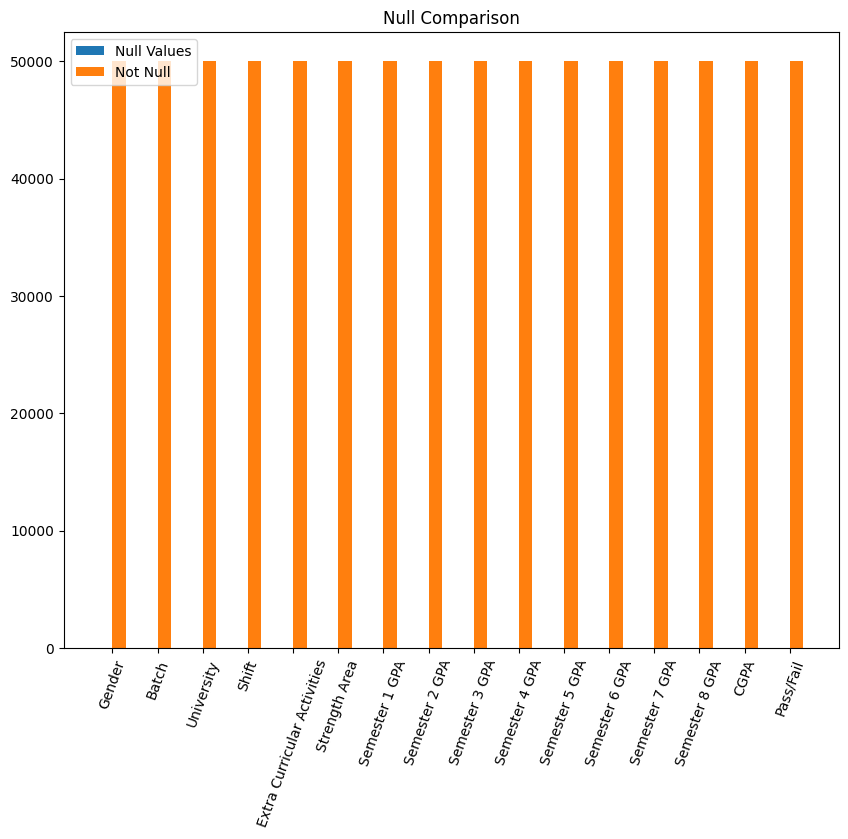

In [16]:
plt.subplots(figsize=(10, 8))
pos = np.arange(len(data.columns))
width = 0.3
plt.bar(pos - width / 2, data.isnull().sum(), width, label='Null Values')
plt.bar(pos + width / 2, data.notnull().sum(), width, label='Not Null')

plt.xticks(pos, rotation=70)
ax = plt.gca()
ax.set_xticklabels(data.columns)

plt.title('Null Comparison')
plt.legend()
plt.show()

In [17]:
# Fill missing values with the mode
strength_mode = data['Strength Area'].mode()[0]
activities_mode = data['Extra Curricular Activities'].mode()[0]

data['Strength Area'].fillna(strength_mode, inplace=True)
data['Extra Curricular Activities'].fillna(activities_mode, inplace=True)

C:\Users\ovais\AppData\Local\Temp\ipykernel_7424\1897537259.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Strength Area'].fillna(strength_mode, inplace=True)
C:\Users\ovais\AppData\Local\Temp\ipykernel_7424\1897537259.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [18]:
# Check for missing values (NaNs) in all columns
missing_values = data.isnull().sum()
# Filter out only the columns that have NaN values
missing_values_with_nan = missing_values[missing_values > 0]
# Display the columns with missing values and how many NaNs are in each
print("Columns with NaN values:")
print(missing_values_with_nan)

Columns with NaN values:
Series([], dtype: int64)


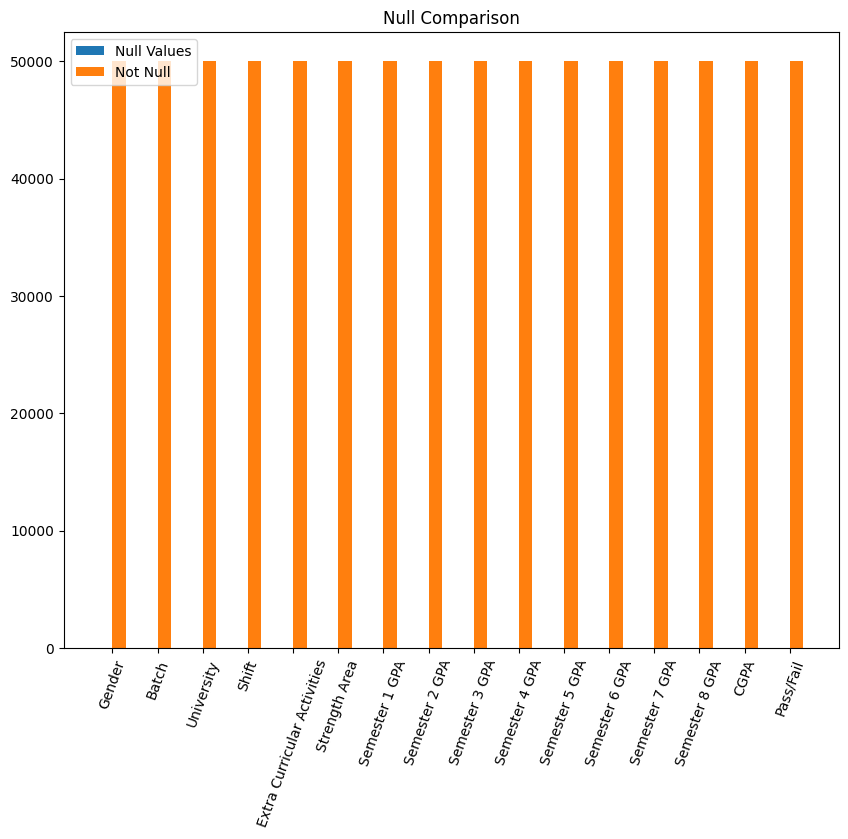

In [19]:
plt.subplots(figsize=(10, 8))
pos = np.arange(len(data.columns))
width = 0.3
plt.bar(pos - width / 2, data.isnull().sum(), width, label='Null Values')
plt.bar(pos + width / 2, data.notnull().sum(), width, label='Not Null')

plt.xticks(pos, rotation=70)
ax = plt.gca()
ax.set_xticklabels(data.columns)

plt.title('Null Comparison')
plt.legend()
plt.show()

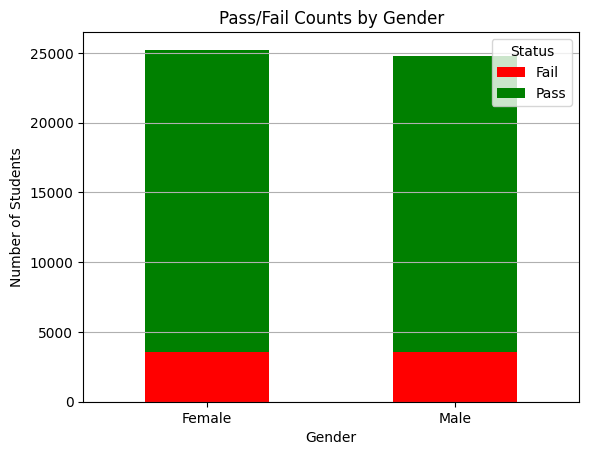

In [20]:
gender_status_counts = data.groupby(['Gender', 'Pass/Fail']).size().unstack(fill_value=0)
gender_status_counts.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Pass/Fail Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.legend(title='Status', loc='upper right')
plt.grid(axis='y')
plt.show()

In [21]:
def analyze_grades(data):
    # Calculate grade counts based on the CGPA values in the DataFrame
    grade_counts = data['CGPA'].apply(lambda x: assign_grade(x)).value_counts().to_dict()
    
    # Display the grade distribution
    print("Grade Distribution:")
    for grade, count in grade_counts.items():
        print(f"{grade}: {count}")

def assign_grade(gpa):
    # Assign grade based on CGPA value
    if gpa >= 3.75:
        return 'A+'
    elif gpa >= 3.5:
        return 'A-'
    elif gpa >= 3.25:
        return 'B+'
    elif gpa >= 3.0:
        return 'B-'
    elif gpa >= 2.75:
        return 'C+'
    elif gpa >= 2.5:
        return 'C-'
    else:
        return 'Fail'
analyze_grades(data)


Grade Distribution:
A+: 7143
A-: 7143
B+: 7143
B-: 7143
Fail: 7143
C+: 7142
C-: 7142


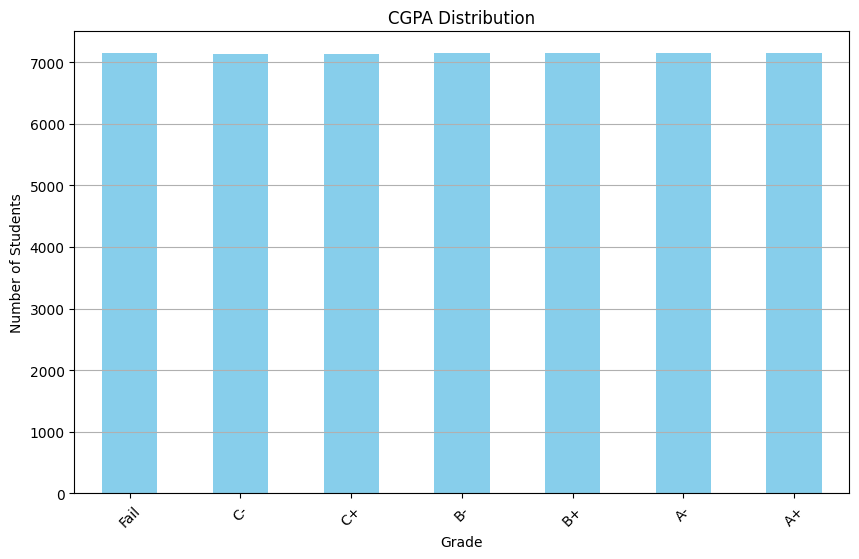

In [22]:
# Define CGPA bins and labels based on the grading scale
bins = [0.0, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0]
labels = ['Fail', 'C-', 'C+', 'B-', 'B+', 'A-', 'A+']

# Count the number of students in each CGPA range
cgpa_counts = pd.cut(data['CGPA'], bins=bins, labels=labels, right=False).value_counts().sort_index()

# Plotting the CGPA distribution
plt.figure(figsize=(10, 6))
cgpa_counts.plot(kind='bar', color='skyblue')
plt.title('CGPA Distribution')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [23]:
# Get unique values in the 'university' column
unique_universities = data['University'].unique()
# Display the unique values
print("Unique universities:")
print(unique_universities)

Unique universities:
['University of Punjab' 'NUST' 'COMSATS' 'University of Karachi' 'IBA']


In [24]:
# Rounding off GPA columns and CGPA column to 2 decimal places
gpa_columns = [col for col in data.columns if 'GPA' in col]
data[gpa_columns] = data[gpa_columns].round(2)

data

,Gender,Batch,University,Shift,Extra Curricular Activities,Strength Area,Semester 1 GPA,Semester 2 GPA,Semester 3 GPA,Semester 4 GPA,Semester 5 GPA,Semester 6 GPA,Semester 7 GPA,Semester 8 GPA,CGPA,Pass/Fail
0,Female,2021,University of Punjab,Morning,Coding Club,Testing,3.97,3.85,3.94,3.77,3.86,3.81,3.86,3.83,3.86,Pass
1,Female,2021,University of Punjab,Evening,Cricket,Testing,3.57,3.71,3.53,3.56,3.66,3.50,3.68,3.71,3.62,Pass
2,Male,2022,University of Punjab,Evening,Music,Testing,3.35,3.36,3.47,3.28,3.33,3.41,3.40,3.39,3.37,Pass
3,Female,2022,NUST,Evening,Art,Data Science,3.19,3.06,3.06,3.25,3.03,3.13,3.13,3.04,3.11,Pass
4,Female,2021,COMSATS,Evening,Coding Club,Cyber Security,2.86,2.98,2.87,2.86,2.91,2.79,2.82,2.76,2.86,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,Male,2020,University of Punjab,Evening,Music,Web Development,0.79,0.82,2.26,1.70,0.33,1.10,1.98,0.99,1.25,Fail
49995,Male,2022,University of Punjab,Morning,Debating,Cyber Security,3.93,3.76,3.95,3.83,3.93,3.76,3.81,3.81,3.85,Pass
49996,Male,2022,IBA,Morning,Art,Web Development,3.64,3.63,3.68,3.65,3.55,3.70,3.53,3.51,3.61,Pass
49997,Female,2021,University of Punjab,Evening,Music,Testing,3.32,3.32,3.47,3.37,3.48,3.48,3.32,3.36,3.39,Pass


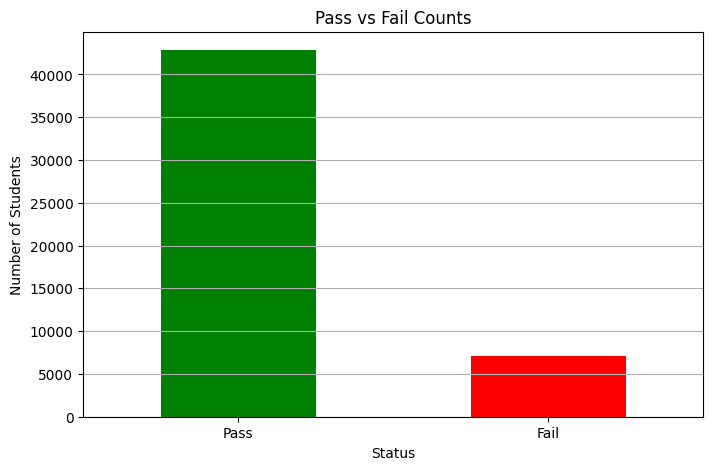

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
pass_fail_counts = data['Pass/Fail'].value_counts()
# Plotting the pass/fail counts
plt.figure(figsize=(8, 5))
pass_fail_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Pass vs Fail Counts')
plt.xlabel('Status')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [26]:
data.columns

Index(['Gender', 'Batch', 'University', 'Shift', 'Extra Curricular Activities',
       'Strength Area', 'Semester 1 GPA', 'Semester 2 GPA', 'Semester 3 GPA',
       'Semester 4 GPA', 'Semester 5 GPA', 'Semester 6 GPA', 'Semester 7 GPA',
       'Semester 8 GPA', 'CGPA', 'Pass/Fail'],
      dtype='object')

In [27]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import pickle
# Load the preprocessed and encoded dataset
# Select only the relevant GPA columns for training
X = data[['Semester 1 GPA', 'Semester 2 GPA', 'Semester 3 GPA', 'Semester 4 GPA', 
          'Semester 5 GPA', 'Semester 6 GPA', 'Semester 7 GPA', 'Semester 8 GPA']]
y = data['CGPA']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)
# Save the label encoder to a .pkl file
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)
print("model saved as model.pkl")

model saved as model.pkl


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_error

# Predict on the testing data
y_test_pred = model.predict(X_test)

# Calculate accuracy metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Testing Data Performance:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R² Score: {r2_test:.2f}")

Testing Data Performance:
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.02
R² Score: 1.00


In [35]:

# Predict example with missing values in GPA columns
example_data = {
    'Semester 1 GPA': [2.22],
    'Semester 2 GPA': [1.99],
    'Semester 3 GPA': [2.12],
    'Semester 4 GPA': [None],
    'Semester 5 GPA': [2.35],
    'Semester 6 GPA': [2.22],
    'Semester 7 GPA': [None],
    'Semester 8 GPA': [2.41]
}
example_df = pd.DataFrame(example_data)

# Predict CGPA for the example
predicted_cgpa = model.predict(example_df)
print("Predicted CGPA:", predicted_cgpa)

Predicted CGPA: [2.46816136]


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

# Load the dataset
# Ensure 'data' is defined before this step
X = data[['Semester 1 GPA', 'Semester 2 GPA', 'Semester 3 GPA', 'Semester 4 GPA', 
          'Semester 5 GPA', 'Semester 6 GPA', 'Semester 7 GPA', 'Semester 8 GPA']]
y = data['CGPA']
# Step 1: Calculate the means of the features
column_means = X.mean().to_dict()

# Step 2: Save the column means to a file
with open("column_means.pkl", "wb") as file:
    pickle.dump(column_means, file)
print("Column means saved as 'column_means.pkl'")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

# Initialize and train the MLPRegressor
mlp_model = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),  
    activation='relu',                
    solver='adam',                    
    learning_rate_init=0.01,          
    max_iter=500,                     
    random_state=42
)

mlp_model.fit(X_train_scaled, y_train)

# Save the trained model
with open("ann_cgpa_model.pkl", "wb") as file:
    pickle.dump(mlp_model, file)
print("Model saved as ann_cgpa_model.pkl")

# Metrics for ANN
y_test_pred_mlp = mlp_model.predict(X_test_scaled)
mae_mlp = mean_absolute_error(y_test, y_test_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_test_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_test_pred_mlp)

print("ANN (MLPRegressor) Results:")
print(f"MAE: {mae_mlp:.2f}")
print(f"MSE: {mse_mlp:.2f}")
print(f"RMSE: {rmse_mlp:.2f}")
print(f"R² Score: {r2_mlp:.2f}")

# Example CGPA Prediction Function
def predict_example_cgpa(example_data):
    example_df = pd.DataFrame(example_data)

    # Handle missing values (use training set mean)
    example_df.fillna(X.mean(), inplace=True)

    # Load scaler and model
    with open("scaler.pkl", "rb") as f:
        loaded_scaler = pickle.load(f)

    with open("ann_cgpa_model.pkl", "rb") as f:
        loaded_model = pickle.load(f)

    # Scale the data
    example_scaled = loaded_scaler.transform(example_df)

    # Predict
    predicted_cgpa = loaded_model.predict(example_scaled)
    return predicted_cgpa

# Example usage
example_data = {
    'Semester 1 GPA': [1.21],
    'Semester 2 GPA': [1.31],
    'Semester 3 GPA': [1.45],
    'Semester 4 GPA': [None],
    'Semester 5 GPA': [0.92],
    'Semester 6 GPA': [1.93],
    'Semester 7 GPA': [None],
    'Semester 8 GPA': [1.31]
}

predicted_cgpa = predict_example_cgpa(example_data)
print("Predicted CGPA (Example):", predicted_cgpa)


Column means saved as 'column_means.pkl'
Model saved as ann_cgpa_model.pkl
ANN (MLPRegressor) Results:
MAE: 0.02
MSE: 0.00
RMSE: 0.03
R² Score: 1.00
Predicted CGPA (Example): [1.7245483]


C:\Users\ovais\AppData\Local\Temp\ipykernel_7424\3219664462.py:69: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  example_df.fillna(X.mean(), inplace=True)


In [34]:
# Example usage
example_data = {
    'Semester 1 GPA': [2.22],
    'Semester 2 GPA': [1.99],
    'Semester 3 GPA': [2.12],
    'Semester 4 GPA': [None],
    'Semester 5 GPA': [2.35],
    'Semester 6 GPA': [2.22],
    'Semester 7 GPA': [None],
    'Semester 8 GPA': [2.41]
}

predicted_cgpa = predict_example_cgpa(example_data)
print("Predicted CGPA (Example):", predicted_cgpa)


Predicted CGPA (Example): [2.39157158]


C:\Users\ovais\AppData\Local\Temp\ipykernel_7424\3219664462.py:69: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  example_df.fillna(X.mean(), inplace=True)


In [31]:
data

,Gender,Batch,University,Shift,Extra Curricular Activities,Strength Area,Semester 1 GPA,Semester 2 GPA,Semester 3 GPA,Semester 4 GPA,Semester 5 GPA,Semester 6 GPA,Semester 7 GPA,Semester 8 GPA,CGPA,Pass/Fail
0,Female,2021,University of Punjab,Morning,Coding Club,Testing,3.97,3.85,3.94,3.77,3.86,3.81,3.86,3.83,3.86,Pass
1,Female,2021,University of Punjab,Evening,Cricket,Testing,3.57,3.71,3.53,3.56,3.66,3.50,3.68,3.71,3.62,Pass
2,Male,2022,University of Punjab,Evening,Music,Testing,3.35,3.36,3.47,3.28,3.33,3.41,3.40,3.39,3.37,Pass
3,Female,2022,NUST,Evening,Art,Data Science,3.19,3.06,3.06,3.25,3.03,3.13,3.13,3.04,3.11,Pass
4,Female,2021,COMSATS,Evening,Coding Club,Cyber Security,2.86,2.98,2.87,2.86,2.91,2.79,2.82,2.76,2.86,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,Male,2020,University of Punjab,Evening,Music,Web Development,0.79,0.82,2.26,1.70,0.33,1.10,1.98,0.99,1.25,Fail
49995,Male,2022,University of Punjab,Morning,Debating,Cyber Security,3.93,3.76,3.95,3.83,3.93,3.76,3.81,3.81,3.85,Pass
49996,Male,2022,IBA,Morning,Art,Web Development,3.64,3.63,3.68,3.65,3.55,3.70,3.53,3.51,3.61,Pass
49997,Female,2021,University of Punjab,Evening,Music,Testing,3.32,3.32,3.47,3.37,3.48,3.48,3.32,3.36,3.39,Pass


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
import pickle

X = data[['CGPA', 'Extra Curricular Activities', 'Gender', 'University', 'Shift']]
y = data['Strength Area']


# Define categorical columns to encode
categorical_features = ['Extra Curricular Activities', 'Gender', 'University', 'Shift']



# Preprocess categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Encode target labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Save the label encoder to a .pkl file
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(label_encoder, file)
print("Label encoder saved as label_encoder.pkl")
# Define the model
model = RandomForestClassifier()

# Create a pipeline with preprocessor and model
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the model
clf.fit(X_train, y_train)
# Save the model to a .pkl file
with open("career_model.pkl", "wb") as file:
    pickle.dump(clf, file)
print("Model saved as career_model.pkl")
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Making a prediction with new data
new_data = pd.DataFrame({
    
    'CGPA': [3.6],
    'Extra Curricular Activities': ['Cricket'],
    'Gender': ['Male'],   # Categorical data as input
    'Shift': ['Evening'],  # Missing value in "Shift"
    'University': ['University of Punjab']  # Categorical data as input
})
prediction = clf.predict(new_data)
predicted_class = label_encoder.inverse_transform(prediction)
print(f'Prediction for new data: {predicted_class[0]}')

Label encoder saved as label_encoder.pkl
Model saved as career_model.pkl
Accuracy: 0.77
Prediction for new data: Testing


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pickle

# Feature and target variables
X = data[['CGPA', 'Extra Curricular Activities', 'Gender', 'University', 'Shift']]
y = data['Strength Area']

# Categorical columns
categorical_features = ['Extra Curricular Activities', 'Gender', 'University', 'Shift']

# Preprocessor: OneHotEncode categorical features and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['CGPA']),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Save the label encoder to a .pkl file
with open("label_encoder_for_ann.pkl", "wb") as file:
    pickle.dump(label_encoder, file)
print("Label encoder saved as label_encoder.pkl")

# Define the ANN model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=500, random_state=42)

# Create a pipeline with the preprocessor and ANN model
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', mlp)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Save the model to a .pkl file
with open("career_ann_model.pkl", "wb") as file:
    pickle.dump(clf, file)
print("Model saved as career_ann_model.pkl")

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Make a prediction with new data
new_data = pd.DataFrame({
    'CGPA': [3.6],
    'Extra Curricular Activities': ['Cricket'],
    'Gender': ['Male'],
    'University': ['University of Punjab'],
    'Shift': ['Evening']
})
prediction = clf.predict(new_data)
predicted_class = label_encoder.inverse_transform(prediction)
print(f'Prediction for new data: {predicted_class[0]}')


Label encoder saved as label_encoder.pkl
Model saved as career_ann_model.pkl
Accuracy: 0.77
Prediction for new data: Testing


In [36]:
# Count of unique values in a column
unique_values_count = data['Extra Curricular Activities'].nunique()
print(f"Number of unique values in 'Color': {unique_values_count}")

# Frequency of each unique value in the column
value_counts = data['Extra Curricular Activities'].value_counts()
print("\nFrequency of each unique value in 'Color':")
print(value_counts)

Number of unique values in 'Color': 6

Frequency of each unique value in 'Color':
Extra Curricular Activities
Football       8386
Music          8347
Coding Club    8326
Art            8321
Debating       8314
Cricket        8305
Name: count, dtype: int64


In [37]:
# Count of unique values in a column
unique_values_count = data['Strength Area'].nunique()
print(f"Number of unique values in 'Color': {unique_values_count}")

# Frequency of each unique value in the column
value_counts = data['Strength Area'].value_counts()
print("\nFrequency of each unique value in 'Color':")
print(value_counts)

Number of unique values in 'Color': 5

Frequency of each unique value in 'Color':
Strength Area
Web Development    11978
Cyber Security      9545
Data Science        9498
Programming         9494
Testing             9484
Name: count, dtype: int64
